# Simulation of the Brownian motion : forward and backward comparison

## Foreward simulation

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
#parameters
T=1

$W_{t_i} - W_{t_{i-1}}$ are all brownian motion, hence they follow iid normal distribution with variance  $\Delta T$ and mean $0$.<br>
So $Z_{i} \sqrt{\Delta T}$ where $ Z_{i}$ is a gaussian distribution with variance $1$ and mean $0$, is a iid normal distribution with variance  $\Delta T$ and mean $0$.<br>

In [4]:
n=13

def generate_mb(T,n): #returns a brownian motion 
    mu, sigma = 0,1 # mean and standard deviation
    delta = 2**(-n)*T 
    W = np.zeros(2**n+1) #list of all of the Wti members of a Brownian motions
    for i in range(1,2**n+1):
        s = np.random.normal(mu, sigma) 
        s=s*np.sqrt(delta)
        W[i]=W[i-1]+s 
    return(W) 

In [5]:
#we generate 1000 Brownian motions
p=1000
all_mb = np.zeros((p,2**n+1)) #the ith row is a brownian motion 
for i in range(p):
    all_mb[i]= generate_mb(T,n)

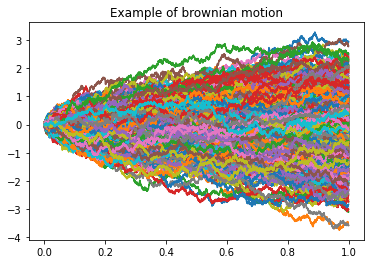

In [6]:

#idx = np.random.randint(0,p) #take a random brownian motions in the 1000 brownian motions available
X = np.linspace(0,T,2**n+1) 
for i in range(p):
    W = all_mb[i]
    plt.plot(X,W)


# displaying the title
plt.title("Example of brownian motion")

plt.show()

### Covariance Matrix

In [7]:
#mean of WT and variance
all_int = np.arange(p)
list_wt = [all_mb[x][2**n] for x in all_int] #returns the list of the 1000 Wt
mean= np.mean(list_wt)
var= np.var(list_wt)
print("The mean at T is : "+str(mean))
print("The variance at T is : "+str(var))

#idem for WT/2
list_wt2 = [all_mb[x][2**(n-1)] for x in all_int]
mean2= np.mean(list_wt2)
print("The mean at T/2 is : "+str(mean2))
print("The covariance matrix is: ")
print(np.cov(list_wt,list_wt2))

The mean at T is : -0.06331824191405194
The variance at T is : 1.0231414476227294
The mean at T/2 is : -0.022088640127342227
The covariance matrix is: 
[[1.02416561 0.49913168]
 [0.49913168 0.49431449]]


### Effect of n

In [8]:
#here n changes 
nmax=13 #n will vary beetween 1 and 13
all_n = np.arange(nmax) #the list of the n 
all_mean = np.zeros(nmax) #each mean is associated to a n
all_variance = np.zeros(nmax) #idem for variance

for k in range(1,nmax):
    #same method than before
    p=1000
    all_mb = np.zeros((p,2**k+1))
    for i in range(p):
        all_mb[i]= generate_mb(T,k)
    all_int = np.arange(p)
    list_wt = [all_mb[x][2**k] for x in all_int]
    list_wt2 = [all_mb[x][2**(k-1)] for x in all_int]
    mean= np.mean(list_wt)
    var= np.var(list_wt)
    all_mean[k]=mean
    all_variance[k] = var
    
    print("For n= "+str(k))
    print("Covariance matrix: "+str(np.cov(list_wt,list_wt2)))


For n= 1
Covariance matrix: [[0.9707282  0.46874912]
 [0.46874912 0.48914026]]
For n= 2
Covariance matrix: [[0.93190088 0.47895364]
 [0.47895364 0.48844706]]
For n= 3
Covariance matrix: [[1.07117424 0.53048327]
 [0.53048327 0.51589501]]
For n= 4
Covariance matrix: [[1.00712228 0.47267226]
 [0.47267226 0.46514359]]
For n= 5
Covariance matrix: [[0.94832681 0.48592644]
 [0.48592644 0.48433972]]
For n= 6
Covariance matrix: [[1.0884193  0.54363475]
 [0.54363475 0.51660059]]
For n= 7
Covariance matrix: [[1.00527988 0.48792547]
 [0.48792547 0.4802684 ]]
For n= 8
Covariance matrix: [[1.04172345 0.51510141]
 [0.51510141 0.49189371]]
For n= 9
Covariance matrix: [[0.99914314 0.52191249]
 [0.52191249 0.53521094]]
For n= 10
Covariance matrix: [[1.01465826 0.50500037]
 [0.50500037 0.51638175]]
For n= 11
Covariance matrix: [[1.01881492 0.49830152]
 [0.49830152 0.51072073]]
For n= 12
Covariance matrix: [[0.95012793 0.48022288]
 [0.48022288 0.49574818]]


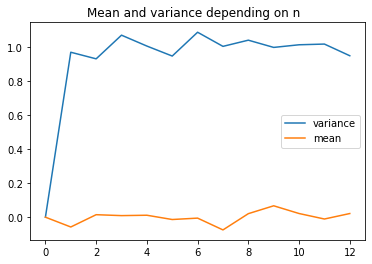

In [9]:
plt.plot(all_n,all_variance,label="variance")
plt.plot(all_n,all_mean,label="mean")


# displaying the title
plt.title("Mean and variance depending on n  ")
plt.legend()
plt.show()

We can assess that : <br>
<ul>
 <li> At times $T=1$ and $T/2=1/2$ the mean is globally equal to $0$ : this is normal because $W_{T}$ and $W_{T/2}$ follow a normal distribution. </li> <br>
<li> Idem for the variance: at time $T=1$ the variance is globally equal to $1$ and at time $T/2=1/2$  the variance is globally equal to $1/2$ : this is normal because $W_{t}$ follows a normal distribution with $t$ as the variance. </li><br><li> For the co-variance: the covariance of $W_{T}$ and $W_{T/2}$ seems to be equal to $1/2$ : in fact the covariance of $W_{t}$ and $W_{s}$ is $min(t,s)$ here it is equal to 1/2</li>
    <br><li> The effect of n is weak : this is because at each time we use 1000 brownian motions. In fact even if we use a low n , at time $T$ it is still a brownian motion. In fact a low n juste shows a brownian motions at a few times but this is still like a brownian motion at this times </li>
               
 
 
    
</ul>


## Backward simulation

In [148]:
def t(i,n,T):
    return(T*i*2**(-n))

def generate_back(T,n):
    WT = np.random.normal(0, 1)*np.sqrt(T) #we generate the last one 
    W = np.zeros(2**n+1)
    W[2**n] = WT 
    for p in range(1,n+1):
        for k in range(2**p):
            if k%2==1 :
                idx=k*2**(n-p)
                idx_back = (k-1)*2**(n-p)
                idx_for = (k+1)*2**(n-p)
                mu=(W[idx_back]+W[idx_for])/2
                sigma= (2**(-p+1))/4
                W[idx] = np.random.normal(mu , np.sqrt(sigma))
    return(W)

In [150]:
#we generate 1000 Brownian motions
p=1000
all_mb_back = np.zeros((p,2**n+1)) #the ith row is a brownian motion 
for i in range(p):
    all_mb_back[i]= generate_back(T,n)

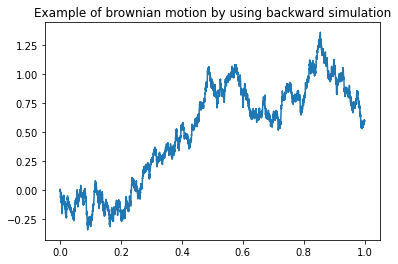

CPU times: user 118 ms, sys: 15.7 ms, total: 134 ms
Wall time: 133 ms


In [155]:

idx = np.random.randint(0,p) #take a random brownian motions in the 1000 brownian motions available
X = np.linspace(0,T,2**n+1) 
W = all_mb_back[idx]
plt.plot(X,W)

# displaying the title
plt.title("Example of brownian motion by using backward simulation")

plt.show()

###   Mean and variance

In [156]:
#mean of WT and variance
all_int = np.arange(p)
list_wt_back = [all_mb_back[x][2**n] for x in all_int] #returns the list of the 1000 Wt
mean= np.mean(list_wt_back)
var= np.var(list_wt_back)
print("The mean at T is : "+str(mean))
print("The variance at T is : "+str(var))

#idem for WT/2
list_wt2_back = [all_mb_back[x][2**(n-1)] for x in all_int]
mean2= np.mean(list_wt2_back)
print("The mean at T/2 is : "+str(mean2))
print("The covariance matrix is: ")
print(np.cov(list_wt,list_wt2))

The mean at T is : -0.019778491329681614
The variance at T is : 0.9580050694884487
The mean at T/2 is : -0.009219333401192608
The covariance matrix is: 
[[0.96650129 0.47834533]
 [0.47834533 0.47579254]]


In [157]:
#here n changes 
nmax=12 #n will vary beetween 1 and 13
all_n = np.arange(nmax) #the list of the n 
all_mean = np.zeros(nmax) #each mean is associated to a n
all_variance = np.zeros(nmax) #idem for variance

for k in range(1,nmax):
    #same method than before
    p=1000
    all_mb = np.zeros((p,2**k+1))
    for i in range(p):
        all_mb[i]= generate_back(T,k)
    all_int = np.arange(p)
    list_wt = [all_mb[x][2**k] for x in all_int]
    list_wt2 = [all_mb[x][2**(k-1)] for x in all_int]
    mean= np.mean(list_wt)
    var= np.var(list_wt)
    all_mean[k]=mean
    all_variance[k] = var
    
    print("For n= "+str(k))
    print("Covariance matrix: "+str(np.cov(list_wt,list_wt2)))


For n= 1
Covariance matrix: [[1.03054379 0.51123799]
 [0.51123799 0.49909656]]
For n= 2
Covariance matrix: [[1.07405064 0.52695561]
 [0.52695561 0.53322225]]
For n= 3
Covariance matrix: [[0.97663165 0.46375151]
 [0.46375151 0.47359526]]
For n= 4
Covariance matrix: [[0.96840065 0.47954084]
 [0.47954084 0.48058806]]
For n= 5
Covariance matrix: [[0.93929718 0.43703315]
 [0.43703315 0.44456823]]
For n= 6
Covariance matrix: [[0.98798926 0.50488722]
 [0.50488722 0.51558899]]
For n= 7
Covariance matrix: [[1.01675586 0.50261376]
 [0.50261376 0.503327  ]]
For n= 8
Covariance matrix: [[1.06329265 0.52271915]
 [0.52271915 0.50467652]]
For n= 9
Covariance matrix: [[1.05125899 0.51270823]
 [0.51270823 0.4868478 ]]
For n= 10
Covariance matrix: [[1.04984544 0.51253583]
 [0.51253583 0.4872315 ]]
For n= 11
Covariance matrix: [[0.97015039 0.48080891]
 [0.48080891 0.48332751]]


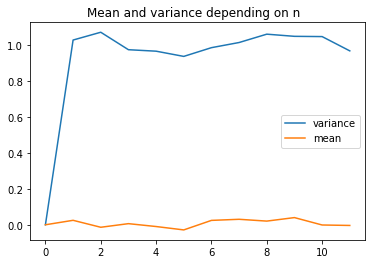

In [158]:
plt.plot(all_n,all_variance,label="variance")
plt.plot(all_n,all_mean,label="mean")


# displaying the title
plt.title("Mean and variance depending on n  ")
plt.legend()
plt.show()


<ul>
 <li> Here the results are quite the same than before: the covariance matrix of $(W_{T},W_{T/2})$ seems to be equal to the one before, idem for the mean. Furthermore, it doesn't change with n.</li> <br>
<li> Here it is totally normal that the variances don't change with n: $W_{T}$ is pulled at the beginning with no effect of n . </li><br>
   <li> Same for $W_{T/2}$ : it is pulled just after $W_{T}$ so $n$ has no effect on it. </li><br>
    
</ul>

# Quadratic Variation

<br>
By knowing that $ (W_{s_{1}},W_{\overline s}, W_{s_{2}})$ has a gaussian distribution with a $(0,0,0)$ mean and 
$ \begin{pmatrix}
s_{1} & s_{1} & s_{1}\\
s_{1} & \overline s & \overline s\\
s_{1} & \overline s & s_{2}
\end{pmatrix} $ , we can find the distribution of $ (W_{s_{1}},W_{\overline s}, W_{s_{2}})$. 
<br>
Same, we know the $ (W_{s_{1}}, W_{s_{2}})$ distribution. <br>
Hence, with a quotient of the 2 probability densities we find that $W_{\overline s} | (W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2})$ has a normal distribution with mean $(x_{1}+x_{2})/2$ and variance $(s_{2}-s_{1})/4$

<br>
The Markov property applied to the filtration $ \sigma (W_{s}, s\leq s_{1})$ and same for $ \sigma (W_{s}, s\geq s_{2})$ with a time reversal and using Markov properties permits to show that knowing $  (W_{s}, s \notin [s_{1},s_{2}])$ is the same taht knowing $  W_{s1},W_{s2} $

In [10]:
 #for foreward variation 

def quad_var(x):
    n = len(x)
    var=0
    for i in range(1,n):
        var += (x[i]-x[i-1])**2
    return(var)

quad_var_for = 0
for i in range(p):
    quad_var_for+= quad_var(all_mb[i])
quad_var_for = quad_var_for/p

quad_var_for

0.9997360187491371

In [175]:
#for backward variation 

def quad_var(x):
    n = len(x)
    var=0
    for i in range(1,n):
        var += (x[i]-x[i-1])**2
    return(var)

quad_var_back = 0
for i in range(p):
    quad_var_back+= quad_var(all_mb_back[i])
quad_var_back = quad_var_back/p

quad_var_back

1.000128959251109

In [179]:
#for foreward variation 
nmax=13 #n will vary beetween 1 and 13
all_n = np.arange(nmax) #the list of the n 
all_quad_var_for = np.zeros(nmax) #each mean is associated to a n

for k in range(1,nmax):
    #same method than before
    p=1000
    all_mb = np.zeros((p,2**k+1))
    for i in range(p):
        all_mb[i]= generate_mb(T,k)
    all_int = np.arange(p)
    quad_var_for = 0
    for i in range(p):
        quad_var_for+= quad_var(all_mb[i])
    quad_var_for = quad_var_for/p
    all_quad_var_for[k]=quad_var_for

    #print("For n= "+str(k))
    #print("Quandratic variation : "+str(quad_var_for))


In [198]:
#for backward variation 
nmax=13 #n will vary beetween 1 and 13
all_n = np.arange(nmax) #the list of the n 
all_quad_var_back = np.zeros(nmax) #each mean is associated to a n

for k in range(1,nmax):
    #same method than before
    p=1000
    all_mb = np.zeros((p,2**k+1))
    for i in range(p):
        all_mb[i]= generate_back(T,k)
    all_int = np.arange(p)
    quad_var_back = 0
    for i in range(p):
        quad_var_back+= quad_var(all_mb[i])
    quad_var_back = quad_var_back/p
    all_quad_var_back[k]=quad_var_back
    #print("For n= "+str(k))
    #print("Quandratic variation : "+str(quad_var_for))

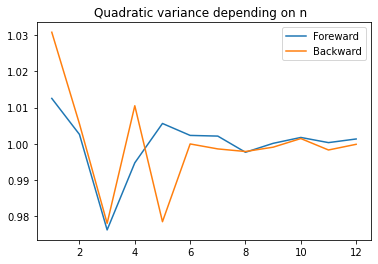

In [199]:
plt.plot(all_n[1:],all_quad_var_for[1:],label="Foreward")
plt.plot(all_n[1:],all_quad_var_back[1:],label="Backward")


# displaying the title
plt.title("Quadratic variance depending on n  ")
plt.legend()
plt.show()

The graph shows that the two ways to converge are quite identic. With the theory we can show that the quadratic variance converges to $T=1$ because $\sum_{n\ge1} 2^{-n}T \lt +\infty$  